In [1]:
source("../shared.R")

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [2]:
library("car")

In [3]:
data("Anscombe")

In [4]:
head(Anscombe)

,education,income,young,urban
ME,189,2824,350.7,508
NH,169,3259,345.9,564
VT,230,3072,348.5,322
MA,168,3835,335.3,846
RI,180,3549,327.1,871
CT,193,4256,341.0,774


In [6]:
Xc = scale(Anscombe, center=TRUE, scale=TRUE)

In [11]:
mean(Xc[,2])

[1] -3.398984e-16

In [7]:
head(Xc)

,education,income,young,urban
ME,-0.15743851,-0.71656340,-0.3416646,-1.0341273
NH,-0.58796740,0.06018628,-0.5419987,-0.6641113
VT,0.72514572,-0.27372680,-0.4334844,-2.2631088
MA,-0.60949384,1.08871001,-0.9844031,1.1991834
RI,-0.35117651,0.57801941,-1.3266405,1.3643691
CT,-0.07133273,1.84046085,-0.7465064,0.7234486


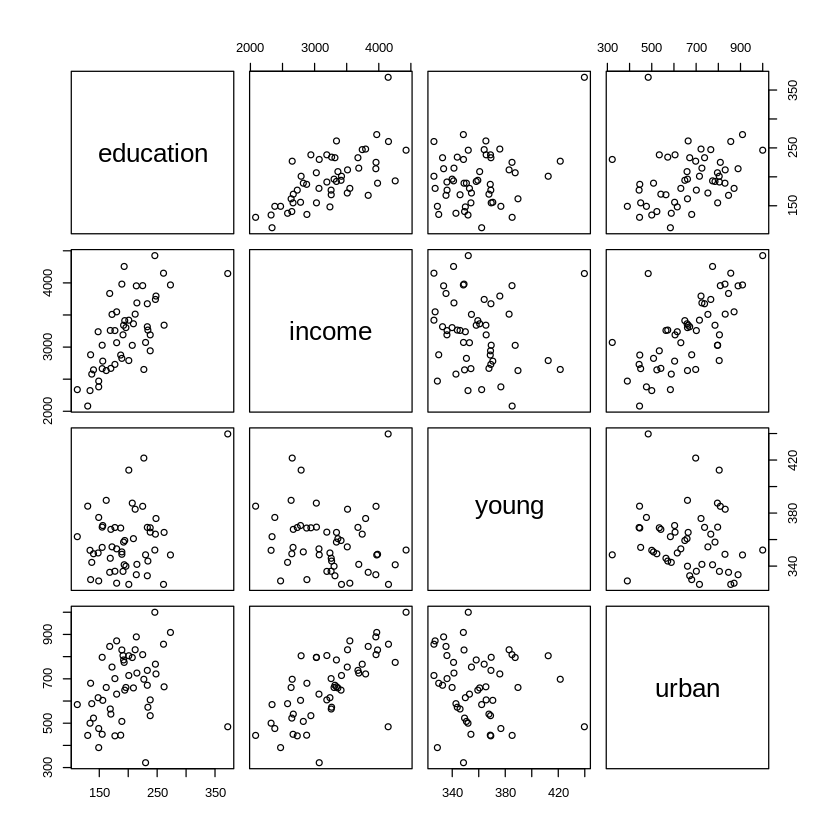

In [21]:
plot(Anscombe)

In [34]:
smod_laplas = "model {
    for (i in 1:length(y)) {
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i] + b[3]*urban[i]        
    }
    for (j in 1:3){
        b[j] ~ ddexp(0, 1)
    }
    b0 ~ dnorm(0, 1e-6)
    prec ~ dgamma(1/2, 1/2)
    sig = sqrt(1/prec)
}"

In [47]:
smod_norm = "model {
    for (i in 1:length(y)) {
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i] + b[3]*urban[i]        
    }
    for (j in 1:3){
        b[j] ~ dnorm(0, 1e-6)
    }
    b0 ~ dnorm(0, 1e-6)
    prec ~ dgamma(5/2, 5*1/2)
    sig = sqrt(1/prec)
}"

In [36]:
dat = list(y=Xc[,1], income=Xc[,2], young=Xc[,3], urban=Xc[,4])

In [30]:
mod_laplas=jags_model_compile(smod_laplas, dat)
modsim_laplas = jags_model_sample(mod_laplas,var_names_ = c("b0", "b", "sig"), n_iter_ = 1e4)
moddiag_laplas = jags_model_diag(modsim_laplas$samples)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 418

Initializing model



In [48]:
dat_norm = list(y=Anscombe$education, income=Anscombe$income, young=Anscombe$young, urban=Anscombe$urban)

In [49]:
mod_norm=jags_model_compile(smod_norm, dat_norm)
modsim_norm = jags_model_sample(mod_norm,var_names_ = c("b0", "b", "sig"), n_iter_ = 1e4)
moddiag_norm = jags_model_diag(modsim_norm$samples)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 420

Initializing model



In [45]:
summary(modsim_laplas$samples_cmb)


Iterations = 1:30000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 30000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean      SD  Naive SE Time-series SE
b[1]  0.9498285 0.11732 0.0006774      0.0014339
b[2]  0.4136827 0.08675 0.0005008      0.0006598
b[3] -0.3245664 0.11693 0.0006751      0.0014146
b0   -0.0001121 0.08392 0.0004845      0.0004845
sig   0.5966133 0.06223 0.0003593      0.0004067

2. Quantiles for each variable:

        2.5%      25%        50%      75%    97.5%
b[1]  0.7173  0.87334  0.9510814  1.02822  1.17702
b[2]  0.2431  0.35567  0.4135936  0.47200  0.58254
b[3] -0.5512 -0.40299 -0.3257109 -0.24789 -0.09298
b0   -0.1638 -0.05584 -0.0003133  0.05504  0.16703
sig   0.4898  0.55280  0.5916527  0.63483  0.73401


In [50]:
summary(modsim_norm$samples_cmb)


Iterations = 1:30000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 30000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean        SD  Naive SE Time-series SE
b[1]    0.08108  0.008878 5.126e-05      0.0005778
b[2]    0.79760  0.145592 8.406e-04      0.0191865
b[3]   -0.10942  0.032063 1.851e-04      0.0017891
b0   -278.69137 59.861350 3.456e-01      8.3332843
sig    25.71610  2.567145 1.482e-02      0.0274404

2. Quantiles for each variable:

           2.5%        25%        50%        75%      97.5%
b[1]    0.06453    0.07487    0.08096    0.08693    0.09957
b[2]    0.53174    0.69685    0.78928    0.88905    1.11330
b[3]   -0.17624   -0.12988   -0.10935   -0.08795   -0.04773
b0   -407.55985 -314.87436 -273.44111 -237.82279 -171.99071
sig    21.27587   23.90957   25.51598   27.30256   31.25751


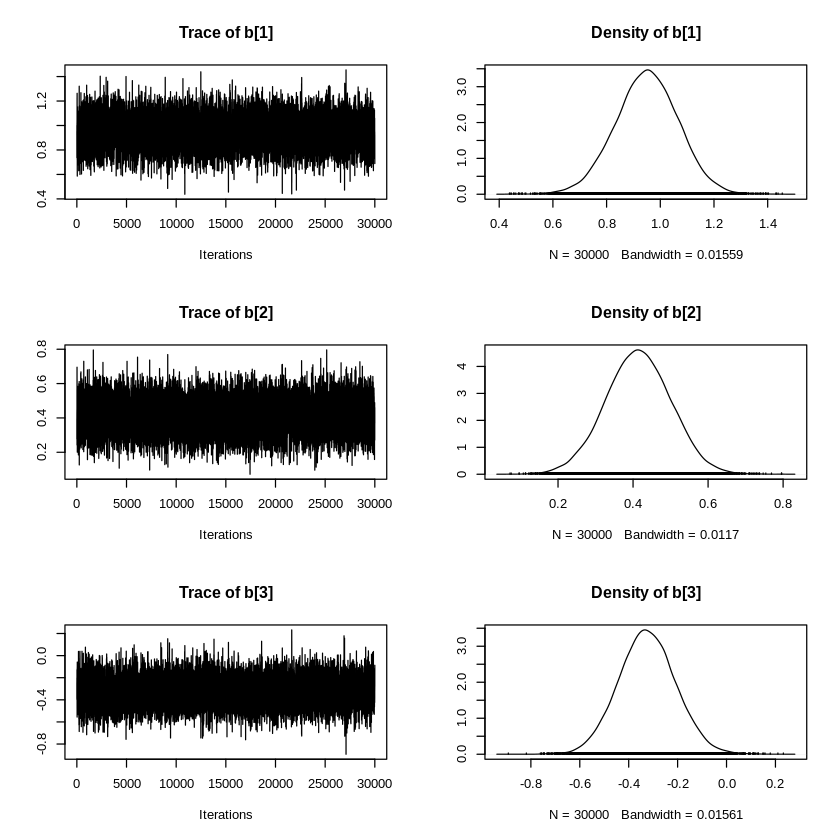

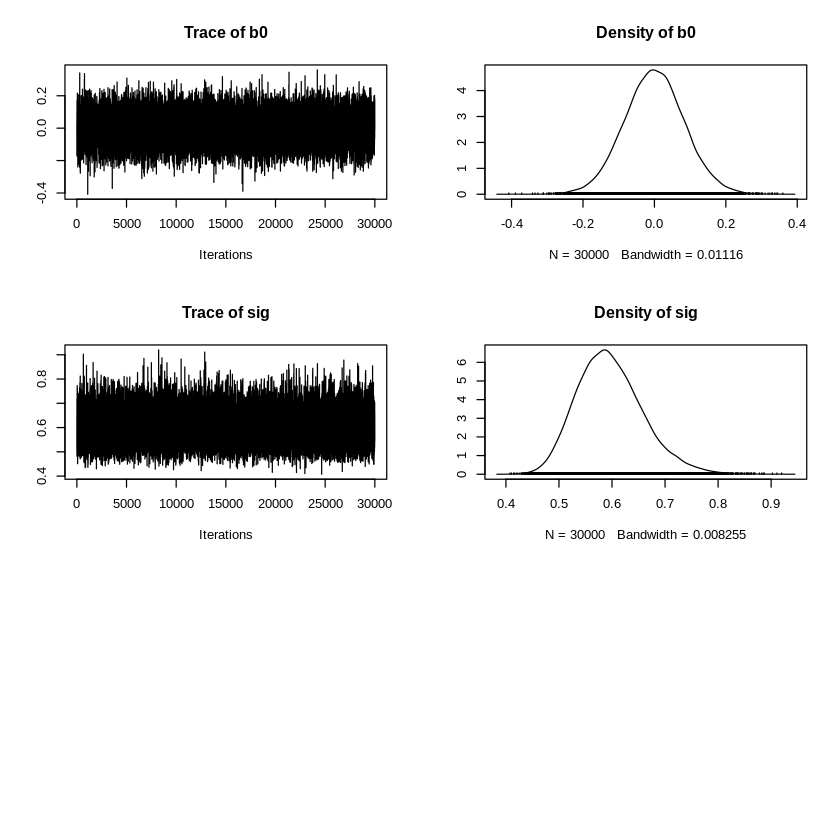

In [31]:
plot(modsim_laplas$samples_cmb)